In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.decomposition import PCA

C:\Users\victo\AppData\Local\Temp\ipykernel_10676\1520530461.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Least Squares Fitting

In [2]:
x = np.linspace(-5, 5, 201)
y = 1 + x + x * np.random.random(len(x))
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [3]:
# normalize using min-max normalization
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [4]:
# assemble matrix A
A = np.concatenate([x, np.ones(len(x)).reshape(-1,1)],axis=1)

In [5]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

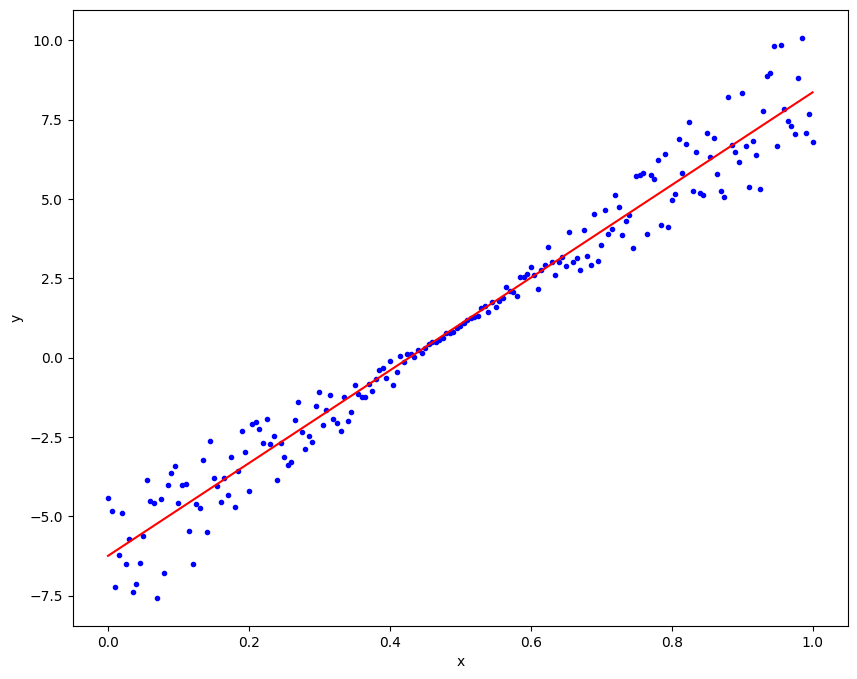

In [6]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# Calculate the MAE (mean absolute error)
y_pred = alpha[0]*x + alpha[1]
residual = y.ravel()-y_pred.ravel()
np.mean(np.abs(residual))

0.6014693394454229

Text(0, 0.5, 'residuals')

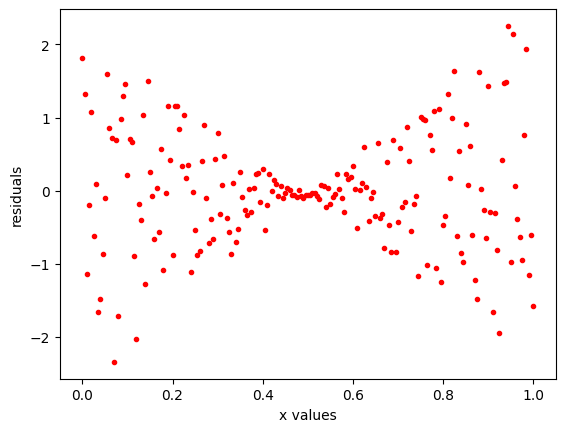

In [8]:
# Plotting the residuals (error after fitting, these dots did not fall on the regression line?)
plt.plot(x,residual,'r.')
plt.xlabel('x values')
plt.ylabel('residuals')

---

# Exercise 1 

1- Do the following for four different degrees: 1, 2, 3, 4
- Use least square method to fit curve to the following dataset and plot the fitting curve. 
- Calculate MAE
- Plot the residuals

2- Compare the errors of fit for different degrees using a bar plot (x axis: degree, y axis: error)

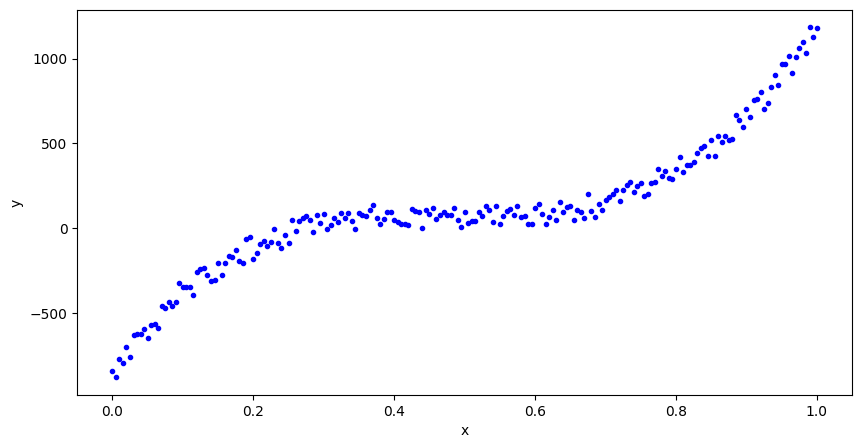

In [9]:
#Create the data
X_values = np.linspace(-10, 10, 201)
Y_values = 1 + X_values + X_values**2 + X_values**3 + 150*np.random.random(len(X_values))

X_values = X_values.reshape(-1,1)
Y_values = Y_values.reshape(-1,1)

#scaling the data
scaler = MinMaxScaler()
X_values = scaler.fit_transform(X_values)

#Plot the results
plt.figure(figsize = (10,5))
plt.plot(X_values, Y_values, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

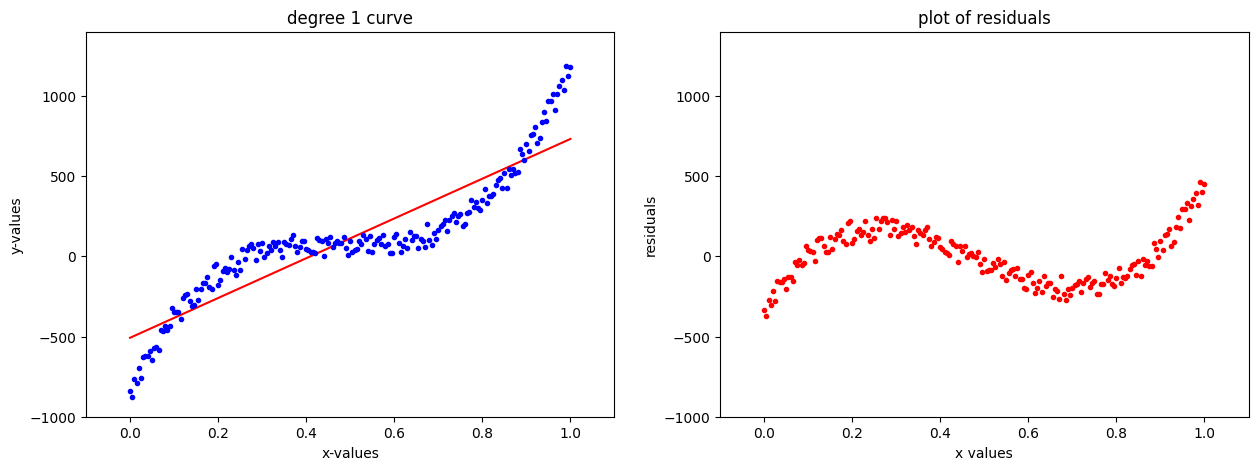

In [10]:
# degree 1 curve

x = X_values.copy()
y = Y_values.copy()
plt.figure(figsize=(15,5))

# creating the matrix A
A = np.concatenate([x, np.ones(len(x)).reshape(-1,1)],axis=1)

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

#calculate MAE
y_pred = alpha[0]*x + alpha[1]
residual = y.ravel()-y_pred.ravel()
mae_deg_1 = np.mean(np.abs(residual))

# plot of data
plt.subplot(1, 2, 1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, alpha[0]*x + alpha[1], 'red')
plt.plot(x, y, 'b.')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('degree 1 curve')

plt.subplot(1, 2, 2)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, residual,'r.')
plt.xlabel('x values')
plt.ylabel('residuals')
plt.title('plot of residuals')

plt.show()

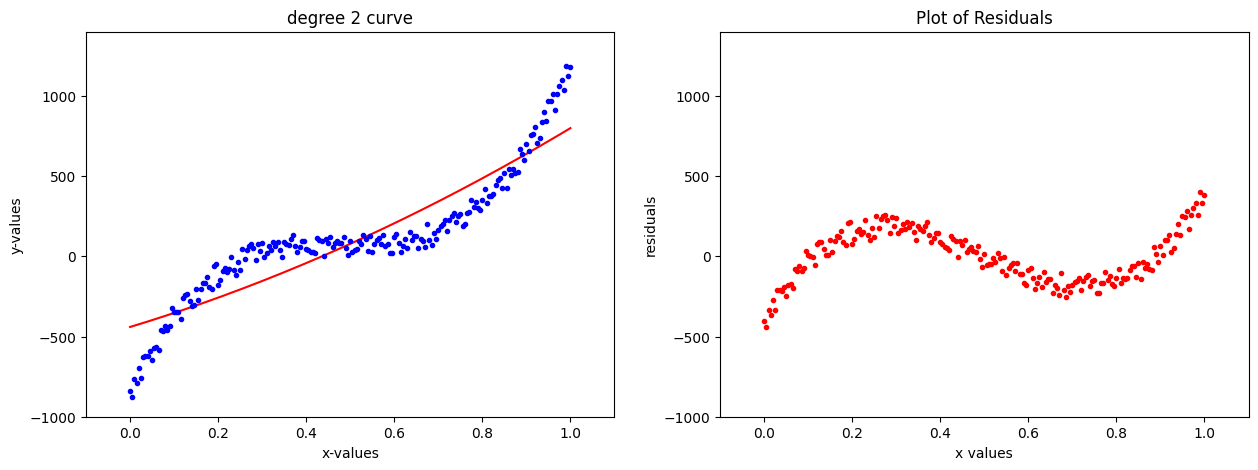

In [11]:
# degree 2 curve

x = X_values.copy()
y = Y_values.copy()

plt.figure(figsize=(15, 5))

# Creating the matrix A for quadratic regression
A = np.concatenate([x**2, x, np.ones(len(x)).reshape(-1, 1)], axis=1)

# Direct least square regression
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

# Calculate MAE
y_pred = alpha[0]*x**2 + alpha[1]*x + alpha[2]
residual = y.ravel() - y_pred.ravel()
mae_deg_2 = np.mean(np.abs(residual))

# Plot of data and regression line
plt.subplot(1, 2, 1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, alpha[0]*x**2 + alpha[1]*x + alpha[2], 'red')  # Quadratic regression curve
plt.plot(x, y, 'b.')  # Original data points as blue dots
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('degree 2 curve')

# Plot of residuals
plt.subplot(1, 2, 2)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, residual, 'r.')  # Residuals as red dots
plt.xlabel('x values')
plt.ylabel('residuals')
plt.title('Plot of Residuals')

plt.show()

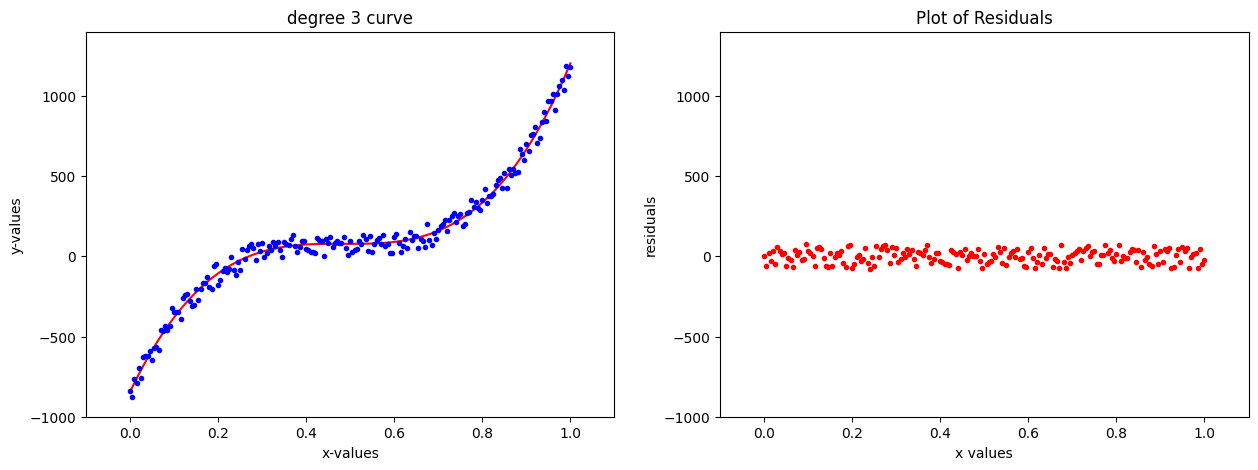

In [12]:
# degree 3 curve

x = X_values.copy()
y = Y_values.copy()
plt.figure(figsize=(15, 5))

# Creating the matrix A for third-degree regression
A = np.concatenate([x**3, x**2, x, np.ones(len(x)).reshape(-1, 1)], axis=1)

# Direct least square regression
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

# Calculate MAE
y_pred = alpha[0]*x**3 + alpha[1]*x**2 + alpha[2]*x + alpha[3]
residual = y.ravel() - y_pred.ravel()
mae_deg_3 = np.mean(np.abs(residual))

# Plot of data and regression line
plt.subplot(1, 2, 1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, alpha[0]*x**3 + alpha[1]*x**2 + alpha[2]*x + alpha[3], 'red')
plt.plot(x, y, 'b.')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('degree 3 curve')

# Plot of residuals
plt.subplot(1, 2, 2)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, residual, 'r.')
plt.xlabel('x values')
plt.ylabel('residuals')
plt.title('Plot of Residuals')

plt.show()


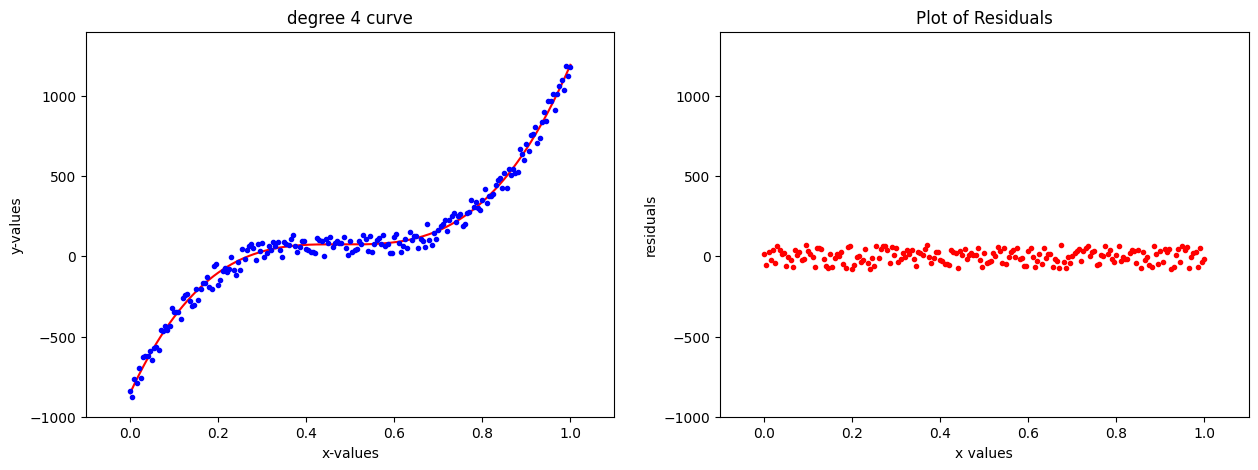

In [13]:
# degree 4 curve

x = X_values.copy()
y = Y_values.copy()
plt.figure(figsize=(15, 5))

# Creating the matrix A for third-degree regression
A = np.concatenate([x**4, x**3, x**2, x, np.ones(len(x)).reshape(-1, 1)], axis=1)

# Direct least square regression
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

# Calculate MAE
y_pred = alpha[0]*x**4 + alpha[1]*x**3 + alpha[2]*x**2 + alpha[3]*x + alpha[4]
residual = y.ravel() - y_pred.ravel()
mae_deg_4 = np.mean(np.abs(residual))

# Plot of data and regression line
plt.subplot(1, 2, 1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, alpha[0]*x**4 + alpha[1]*x**3 + alpha[2]*x**2 + alpha[3]*x + alpha[4], 'red')
plt.plot(x, y, 'b.')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('degree 4 curve')

# Plot of residuals
plt.subplot(1, 2, 2)
plt.xlim(-0.1, 1.1)
plt.ylim(-1000, 1400)
plt.plot(x, residual, 'r.')
plt.xlabel('x values')
plt.ylabel('residuals')
plt.title('Plot of Residuals')

plt.show()

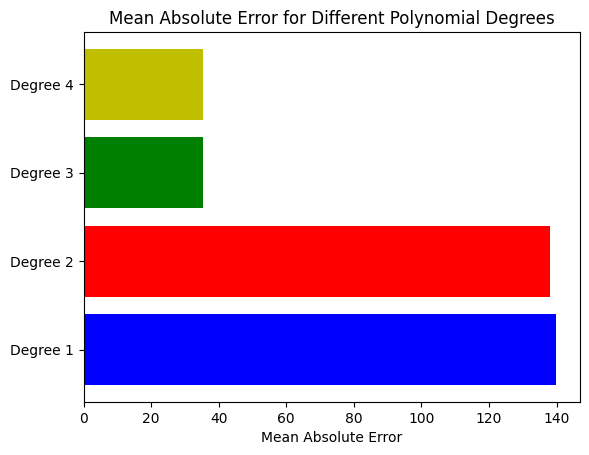

In [14]:
# bar plot to compare MAE for different fits
colors = ['b', 'r', 'g', 'y']
values = [mae_deg_1, mae_deg_2, mae_deg_3, mae_deg_4]
plt.barh(range(len(values)), values, color=colors)
plt.yticks(range(len(values)), ['Degree 1', 'Degree 2', 'Degree 3', 'Degree 4'])
plt.xlabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Different Polynomial Degrees')
plt.show()


---

# Excercise 2 (Multidimensional fit)

- Normalize the data using min-max normalization
- Use least square method to fit a second degree curve to the following dataset and plot the fitting curve
- Calculate MAE
- Which feature has the most contribution to predictions? (hint: you should understand based on the weights of features)

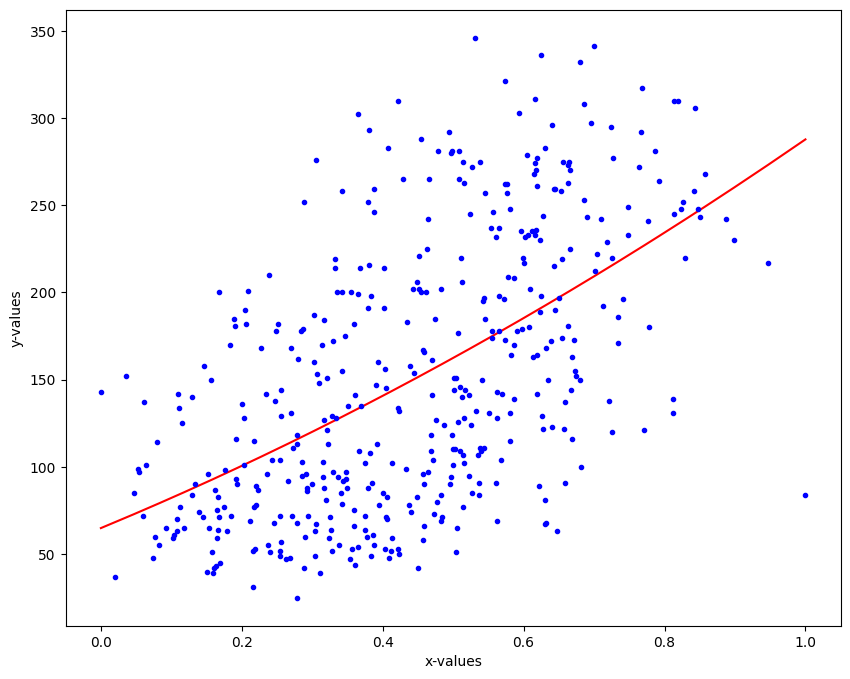

The MAE for this fit is: 90.02167617831505
In our case, the weight of the linear term has the greatest magnitude. This weight has a value of [167.33471186], 
 as compared to the quadretic term with a weight of [55.4645459] and the constant [64.91578353].


In [15]:
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA

# Load the diabetes dataset
x = load_diabetes().data
y = load_diabetes().target
feat_names = load_diabetes().feature_names
df = pd.DataFrame(x, columns=feat_names)


# Normalize the data using min-max normalization
pca_1f = PCA(n_components=1)
x_pca = pca_1f.fit_transform(x)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_pca)
y_scaled = y.reshape(-1, 1)


# Use least square method to fit a second-degree curve to the dataset and plot the fitting curve
A = np.concatenate([x_scaled**2, x_scaled, np.ones(len(x_scaled)).reshape(-1, 1)], axis=1)

alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y_scaled)

sorted_indices = np.argsort(x_scaled.flatten())
x_sorted = x_scaled[sorted_indices]
y_sorted = y_scaled[sorted_indices]

plt.figure(figsize=(10, 8))
plt.plot(x_sorted, alpha[0]*x_sorted**2 + alpha[1]*x_sorted + alpha[2], 'r')  
plt.plot(x_sorted, y_sorted, 'b.')  
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()


# Calculate MAE
y_pred = alpha[0]*x**2 + alpha[1]*x + alpha[2]
residual = y_scaled - y_pred
mae_deg_2 = np.mean(np.abs(residual))
print(f"The MAE for this fit is: {mae_deg_2}")


# Which feature has the most contribution to predictions?
print(f"In our case, the weight of the linear term has the greatest magnitude. This weight has a value of {alpha[1]}, \n as compared to the quadretic term with a weight of {alpha[0]} and the constant {alpha[2]}.")


y = 64.9 + 167.3x +55.5x^2 